This python script is used to get the qualifying and race position data from historical races for comparison in section 6, to see the impact of qualifying position on the final race outcome

In [2]:
import pandas as pd
import numpy as np
import formula1 as f1

In [3]:
master = pd.DataFrame()

for n in range(1996, 2022):
    temp = pd.DataFrame()
    for i in range(1, 25):
        try:
            quali = f1.get_qualifying_result(n, i)
            race = f1.get_race_result(n, i)
            quali.rename(columns={'position': 'qualipos'}, inplace=True)
            quali['race'] = i
            quali = quali[['race', 'driverID', 'qualipos']]
            quali = quali.sort_values('driverID')
            quali = quali.set_index('driverID')
            race['race'] = i
            race.rename(columns={'position': 'racepos'}, inplace=True)
            race = race[['race', 'driverID', 'racepos']]
            race = race.sort_values('driverID')
            race = race.set_index('driverID')
            temp = temp.append(quali)
            temp['racepos'] = race['racepos']
        except IndexError:
            break
    master = master.append(temp)


In [4]:
master

,race,qualipos,racepos
driverID,,,
alguersuari,1,18,9
alonso,1,3,7
barrichello,1,11,12
bruno_senna,1,23,19
buemi,1,15,15
...,...,...,...
russell,22,17,18
sainz,22,5,3
stroll,22,13,13


In [5]:
master = master.reset_index()
"""master = master[master.driverID != 'mazepin']
master = master[master.driverID != 'marques']
master = master[master.driverID != 'larini']
master = master[master.driverID != 'panis']
master = master[master.driverID != 'morbidelli']
master = master[master.driverID != 'wurz']
master = master[master.driverID != 'grosjean']
master = master[master.driverID != 'kubica']"""

dropdfs = master[master['racepos'].isnull()]



In [6]:
indexlist = dropdfs.index

In [7]:
indexlistarray = np.array(indexlist)


In [8]:
master.drop(indexlistarray, inplace=True)

In [15]:
master2 = pd.DataFrame()
master2['qualipos'] = master['qualipos'].astype(int)
master2['racepos'] = master['racepos'].astype(int)

In [18]:
master2 = master2[master2.qualipos <= 10]
master2 = master2[master2.racepos <= 10]


In [17]:
#master.to_csv('qualiracecorr.csv')

In [19]:
x = master['qualipos'].astype(int)
y = master['racepos'].astype(int)

In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
from scipy.stats import linregress  

/var/folders/ry/nqgxl42n3vjg1sj6zlxsr0rr0000gn/T/ipykernel_5603/3536358846.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model.fit(x[:, np.newaxis], y)


0.5932336302106936 4.4962097351552766 0.5860820933556453 0.0 0.011792318629170422
0.34


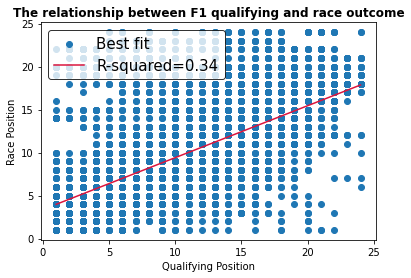

In [20]:
poly_model = make_pipeline(PolynomialFeatures(10), LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 2)
yfit = poly_model.predict(xfit[:, np.newaxis])

# Plotting data
plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson')
plt.xlabel('Qualifying Position')
plt.ylabel('Race Position')

# Additional statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
r_squared="{:.2f}".format(r_value**2)

# Formatting
plt.legend(('Best fit', 'R-squared={}'.format(r_squared)), fontsize=15, loc="upper left", borderpad=0.4, edgecolor="black")
plt.title("The relationship between F1 qualifying and race outcome", fontweight="bold")

print(slope, intercept, r_value, p_value, std_err)
print(r_squared)

In [80]:
master['qualipos'] = master['qualipos'].astype(int)
master['racepos'] = master['racepos'].astype(int)


In [87]:
master.to_csv('qualirace.csv')

/var/folders/ry/nqgxl42n3vjg1sj6zlxsr0rr0000gn/T/ipykernel_5603/796523177.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Race')

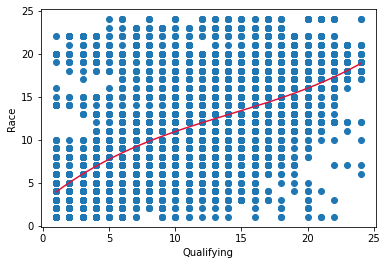

In [21]:
poly_model = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson')
plt.xlabel('Qualifying')
plt.ylabel('Race')